In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense
import time
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [ ]:
#GENERATING RANDOM DATASET WITH SAMPLES(ROWS) = 5000 AND FEATURES(COLUMNS)=20


#X, y = datasets.make_classification(n_samples=5000,n_features=20, random_state=1)
#X_train = np.asarray(X[:4000])#classifying training dataset of 4000 samples
#X_test = np.asarray(X[4000:])#classifying testing dataset of 1000 samples
#train_dataset["Y"] =y[:2500]
#train_dataset.shape
#type(train_dataset)
#test_dataset = pd.DataFrame(X[2500:])
#y_train = np.asarray(y[:4000])#classifying training dataset of 5000 samples(output(0 or 1))
#y_test = np.asarray(y[4000:])#classifying testing dataset of 1000 samples(output(0 or 1))



In [ ]:
#MOUNTING GOOGLE DRIVE TO COLAB
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#LOADING DATASET FROM GOOGLE DRIVE
df = pd.read_csv('/content/drive/My Drive/DL.csv')
dataset=df.values
X = dataset[:,0:2]
Y = dataset[:,2]

In [ ]:
#scaling data to fit in range of 0 to 1 
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
#spliting dataset
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
  #functions for activation function : tanh(tan hyperparameter) and sigmoid
def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [ ]:
#model for training data [ACTIVATION FUNCTION = SIGMOID]

model = Sequential()
model.add(Dense(16, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
 
t = time.time()
#print(t)
m = model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

m1 = model.fit(X_train,Y_train,validation_data = (X_val, Y_val),epochs=500,verbose = 2)

t1 = time.time()
#print(t)
#print(t1)
print("time taken",t1-t,'secs')


Epoch 1/500
26/26 - 1s - loss: 0.2124 - accuracy: 0.8870 - val_loss: 0.1932 - val_accuracy: 0.8750 - 1s/epoch - 43ms/step
Epoch 2/500
26/26 - 0s - loss: 0.1796 - accuracy: 0.8117 - val_loss: 0.1709 - val_accuracy: 0.7727 - 121ms/epoch - 5ms/step
Epoch 3/500
26/26 - 0s - loss: 0.1618 - accuracy: 0.7861 - val_loss: 0.1602 - val_accuracy: 0.7727 - 120ms/epoch - 5ms/step
Epoch 4/500
26/26 - 0s - loss: 0.1528 - accuracy: 0.7861 - val_loss: 0.1546 - val_accuracy: 0.7727 - 113ms/epoch - 4ms/step
Epoch 5/500
26/26 - 0s - loss: 0.1478 - accuracy: 0.7861 - val_loss: 0.1509 - val_accuracy: 0.7727 - 96ms/epoch - 4ms/step
Epoch 6/500
26/26 - 0s - loss: 0.1440 - accuracy: 0.7861 - val_loss: 0.1478 - val_accuracy: 0.7727 - 118ms/epoch - 5ms/step
Epoch 7/500
26/26 - 0s - loss: 0.1408 - accuracy: 0.7861 - val_loss: 0.1447 - val_accuracy: 0.7727 - 121ms/epoch - 5ms/step
Epoch 8/500
26/26 - 0s - loss: 0.1376 - accuracy: 0.7861 - val_loss: 0.1414 - val_accuracy: 0.7727 - 144ms/epoch - 6ms/step
Epoch 9/500

In [ ]:
m1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train = m1.history['accuracy']
#train1 = pd.DataFrame(train)#use for exporting to csv
train2 = np.array(train)
valid_acc = m1.history['val_accuracy']

In [ ]:
#EXPORTING DATASET FROM GOOGLE COLAB TO LOCAL MACHINE
#from google.colab import files
#train1.to_csv('data.csv') 
#files.download("data.csv")


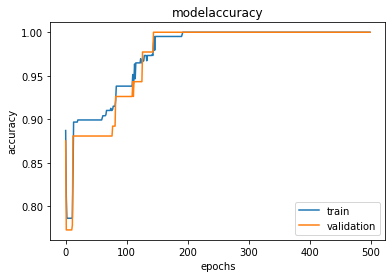

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train2,label='train')
plt.plot(valid_acc,label='validation')
plt.legend()
plt.title('modelaccuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

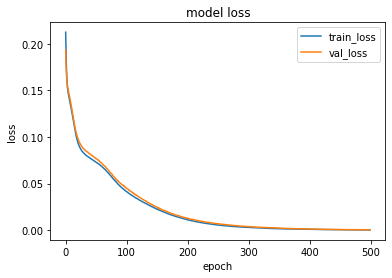

In [ ]:
plt.plot(m1.history['loss'],label='train_loss')
plt.plot(m1.history['val_loss'],label='val_loss')
plt.legend()
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()